In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv(r'C:\Users\91934\Downloads\prediction.csv')
df

,Unnamed: 0,area,prices
0,0,1000,3.164041e+05
1,1,1500,3.842979e+05
2,2,2300,4.929281e+05
3,3,3540,6.613048e+05
4,4,4120,7.400616e+05
5,5,4560,7.998082e+05
6,6,5490,9.260908e+05
7,7,3460,6.504418e+05
8,8,4750,8.256079e+05
9,9,2300,4.929281e+05


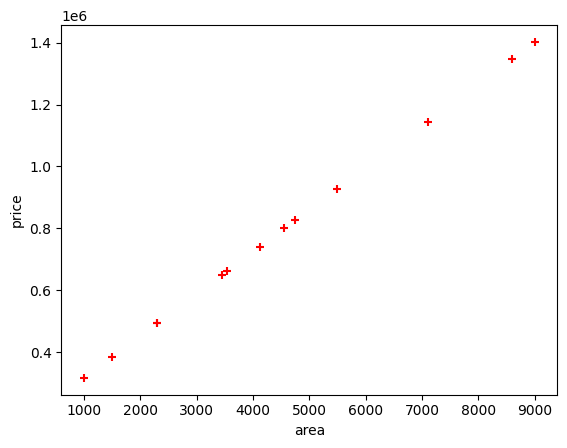

In [13]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.prices,color='red',marker='+')         

In [15]:
li_reg = linear_model.LinearRegression()
li_reg.fit(df[['area']],df.prices)
li_reg.predict(3000)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=3000.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.